In [1]:
cd /home/karen/Documents/GitHub/Muscle_wasting

/home/karen/Documents/GitHub/Muscle_wasting


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import mirna_scoring.walking_network as wn
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mirna_scoring.mirna_impact as mis
import seaborn as sns
import mirna_scoring.mirna_influence_plots as mi_plot
import mirna_scoring.jupyter_functions as jf
from  mirna_scoring.score import *

In [3]:
from importlib import reload  # Python 3.4+
import mirna_scoring.mirna_impact as mis

In [4]:
network = nx.read_gpickle(f"network/Networks_pkl/complete_n_tf_mirnas__Sarcopenia_relevant_normalize_cutoff_0.95.pkl")
my_network = mis.mirna_network(network=network)

In [7]:
scores = my_network.quick_get_all_scores(steps=3, sample_size=10, dds_threshold=0, pathway_keywords=['ATP'])

In [70]:

# Select top 5 extreme rows using Z-score
#top_rows_zscore = select_extreme_rows(scores, x=5, method='zscore')

# Select top 5 extreme rows using IQR
top_rows_extreme, row_scores_extreme = select_extreme_rows(scores, x=5, method='iqr')
top_rows_ranked, row_scores_top = select_top_ranked_rows(scores, x=5)
top_rows_ranked_normalized, row_scores_normalized = select_top_normalized_rows(scores, x=5)


In [11]:
mirnas = []
mirnas.extend(top_rows_extreme.index)
mirnas.extend(top_rows_ranked.index)
mirnas.extend(top_rows_ranked_normalized.index)


{'hsa-miR-1-3p',
 'hsa-miR-106a-5p',
 'hsa-miR-125a-5p',
 'hsa-miR-155-5p',
 'hsa-miR-17-5p',
 'hsa-miR-204-5p',
 'hsa-miR-21-5p',
 'hsa-miR-34a-5p'}

In [12]:

for comparison in my_network.get_all_available_combinations():
    mir = my_network.get_best_inhibitor_in_comparison(comparison)
    mirnas.append(mir)
    mir = my_network.get_best_activator_in_comparison(comparison)
    mirnas.append(mir)
    

In [13]:
mirnas = list(set(mirnas))
mirnas

['hsa-miR-21-5p',
 'hsa-miR-200b-3p',
 'hsa-miR-1-3p',
 'hsa-miR-20a-5p',
 'hsa-miR-125a-5p',
 'hsa-miR-29a-3p',
 'hsa-miR-34a-5p',
 'hsa-miR-17-5p',
 'hsa-miR-106a-5p',
 'hsa-miR-155-5p',
 'hsa-miR-27a-3p',
 'hsa-miR-204-5p']

In [14]:
dist_df = my_network.get_mirnas_similarity()
mirna_clusters = jf.cluster_mirnas(dist_matrix_square=dist_df, n_clusters=5)
minas_cluster = mirna_clusters.sort_values(by=["Cluster"])['Cluster']

Cluster labels:
 [3 1 0 0 4 0 4 0 0 0 1 1 1 1 0 1 0 1 2]


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [15]:
clustered_mirnas = {}
for mirna in mirnas:
    if mirna in minas_cluster.index:
        cluster = minas_cluster[mirna]
        if cluster not in clustered_mirnas:
            cluster=int(cluster)
            clustered_mirnas[cluster] = []
        clustered_mirnas[cluster].append(mirna)
clustered_mirnas

{3: ['hsa-miR-21-5p'],
 0: ['hsa-miR-200b-3p', 'hsa-miR-1-3p', 'hsa-miR-20a-5p', 'hsa-miR-27a-3p'],
 1: ['hsa-miR-125a-5p',
  'hsa-miR-29a-3p',
  'hsa-miR-34a-5p',
  'hsa-miR-155-5p',
  'hsa-miR-204-5p'],
 4: ['hsa-miR-17-5p', 'hsa-miR-106a-5p']}

mirna_scoring/sub_plots/hsa-miR-17-5p.html
mirna_scoring/sub_plots/hsa-miR-17-5p.html
Saved on mirna_scoring/sub_plots/hsa-miR-17-5p.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


mirna_scoring/sub_plots/hsa-miR-106a-5p.html
mirna_scoring/sub_plots/hsa-miR-106a-5p.html
Saved on mirna_scoring/sub_plots/hsa-miR-106a-5p.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


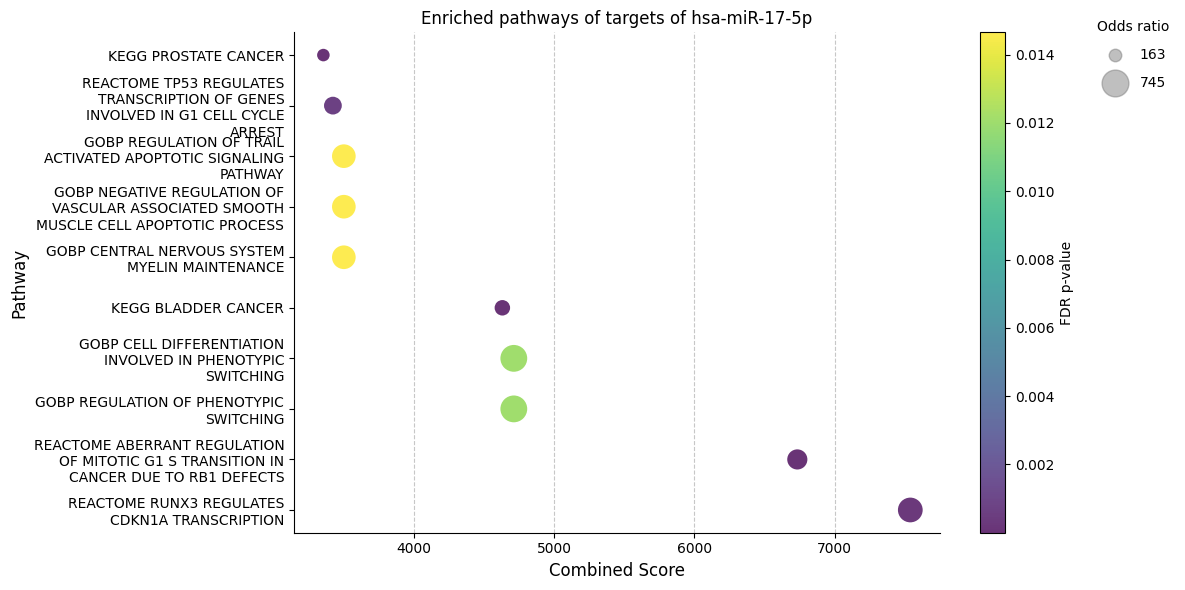

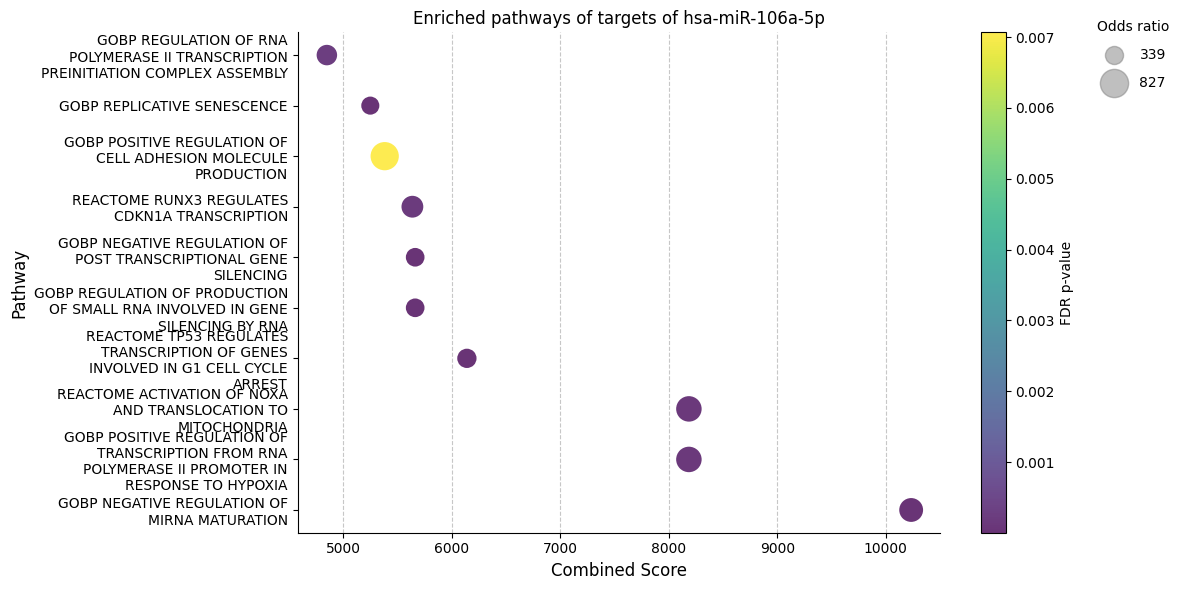

In [82]:
genes = []
for mirna in mirnas:
    paths = my_network.mirnas_paths[mirna]
    sub_network=[]
    for path in paths:
        sub_network.extend(path)
        genes.extend(path)
    sub_network=list(set(sub_network))
    #mi_plot.draw_network(G=my_network.network, node_list = sub_network, name= mirna, save_path='mirna_scoring/sub_plots')
    html_file = mi_plot.generate_html_network_report(network=my_network.network, selected_nodes=sub_network, name=mirna, save_path='mirna_scoring/sub_plots')
    fig, ax = get_plot_enriched(sub_network, f"Enriched pathways of targets of {mirna}")
    image_file = f'{html_file}_PathwayEnriched.png'
    fig.savefig(image_file, dpi=300, bbox_inches='tight')
    with open(html_file, "r") as file:
        html_content = file.read()

    # Append the image tag to the HTML
    html_content += f"""
    <h2>Enriched Pathways</h2>
    <img src="{image_file}" alt="Enriched Pathways">
    """
    
    # Save the modified HTML file
    with open(html_file, "w") as file:
        file.write(html_content)

In [17]:
for cluster, mirnas in clustered_mirnas.items():
    sub_network_cluster=[]
    for mirna in mirnas:
        paths = my_network.mirnas_paths[mirna]
        for path in paths:
            sub_network_cluster.extend(path)
    sub_network_cluster=list(set(sub_network_cluster))
    print(len(sub_network_cluster))
    mi_plot.generate_html_network_report(network=my_network.network, selected_nodes=sub_network_cluster, name=mirna+f"_cluster_{cluster}", save_path='mirna_scoring/sub_plots')
    #mi_plot.draw_network(G=my_network.network, node_list = sub_network_cluster, name= mirna+f"_cluster_{cluster}", save_path='mirna_scoring/sub_plots')
    html_file = f"mirna_scoring/sub_plots/{mirna}_cluster_{cluster}.html"
    
    

12
mirna_scoring/sub_plots/hsa-miR-21-5p_cluster_3.html
mirna_scoring/sub_plots/hsa-miR-21-5p_cluster_3.html
Saved on mirna_scoring/sub_plots/hsa-miR-21-5p_cluster_3.html
30
mirna_scoring/sub_plots/hsa-miR-27a-3p_cluster_0.html
mirna_scoring/sub_plots/hsa-miR-27a-3p_cluster_0.html
Saved on mirna_scoring/sub_plots/hsa-miR-27a-3p_cluster_0.html
43
mirna_scoring/sub_plots/hsa-miR-204-5p_cluster_1.html
mirna_scoring/sub_plots/hsa-miR-204-5p_cluster_1.html
Saved on mirna_scoring/sub_plots/hsa-miR-204-5p_cluster_1.html
23
mirna_scoring/sub_plots/hsa-miR-106a-5p_cluster_4.html
mirna_scoring/sub_plots/hsa-miR-106a-5p_cluster_4.html
Saved on mirna_scoring/sub_plots/hsa-miR-106a-5p_cluster_4.html


In [18]:
sub_network_cluster

['hsa-miR-106a-5p',
 'E2F1',
 'TGFBR2',
 'CCND1',
 'STAT3',
 'HMGB1',
 'CLOCK',
 'CDKN1A',
 'AR',
 'BCL2',
 'MFN2',
 'SMAD4',
 'TERT',
 'TP53',
 'DNMT1',
 'IL1B',
 'SPARC',
 'PTEN',
 'BCL6',
 'VEGFA',
 'HSP90AB1',
 'FKBP5',
 'hsa-miR-17-5p']

In [19]:
genes = list(set(genes))

In [20]:
jf.get_cytoscape_filter_from_list(genes)

'(NCL)|(BMI1)|(SIRT1)|(hsa-miR-20a-5p)|(hsa-miR-125a-5p)|(MYC)|(IGF1)|(RUNX2)|(SNAI2)|(BCL2L11)|(CYCS)|(hsa-miR-106a-5p)|(PER1)|(NR2E1)|(hsa-miR-155-5p)|(SOX2)|(TWIST1)|(TGFBR2)|(CCND1)|(E2F1)|(AKT1)|(PIK3R1)|(hsa-miR-21-5p)|(STAT3)|(hsa-miR-200b-3p)|(HMGB1)|(CLOCK)|(WNK1)|(CDKN1A)|(HSPB1)|(MCL1)|(AR)|(SMAD2)|(ABCB1)|(EGFR)|(BCL2)|(MFN2)|(SMAD4)|(CYP11A1)|(hsa-miR-1-3p)|(TERT)|(TP53)|(DNMT1)|(FOXM1)|(hsa-miR-34a-5p)|(ERBB2)|(STAT1)|(ZEB1)|(KRAS)|(hsa-miR-27a-3p)|(IL1B)|(ITGB1)|(ANKRD1)|(SPARC)|(PTEN)|(BCL6)|(VEGFA)|(FBXO32)|(UBE2B)|(NPPA)|(hsa-miR-29a-3p)|(GSTP1)|(SOX4)|(HSP90AB1)|(FKBP5)|(hsa-miR-17-5p)|(GSK3B)|(CRYAB)|(NOTCH1)|(hsa-miR-204-5p)|(SP1)|(CD36)|'

In [21]:
genes

['NCL',
 'BMI1',
 'SIRT1',
 'hsa-miR-20a-5p',
 'hsa-miR-125a-5p',
 'MYC',
 'IGF1',
 'RUNX2',
 'SNAI2',
 'BCL2L11',
 'CYCS',
 'hsa-miR-106a-5p',
 'PER1',
 'NR2E1',
 'hsa-miR-155-5p',
 'SOX2',
 'TWIST1',
 'TGFBR2',
 'CCND1',
 'E2F1',
 'AKT1',
 'PIK3R1',
 'hsa-miR-21-5p',
 'STAT3',
 'hsa-miR-200b-3p',
 'HMGB1',
 'CLOCK',
 'WNK1',
 'CDKN1A',
 'HSPB1',
 'MCL1',
 'AR',
 'SMAD2',
 'ABCB1',
 'EGFR',
 'BCL2',
 'MFN2',
 'SMAD4',
 'CYP11A1',
 'hsa-miR-1-3p',
 'TERT',
 'TP53',
 'DNMT1',
 'FOXM1',
 'hsa-miR-34a-5p',
 'ERBB2',
 'STAT1',
 'ZEB1',
 'KRAS',
 'hsa-miR-27a-3p',
 'IL1B',
 'ITGB1',
 'ANKRD1',
 'SPARC',
 'PTEN',
 'BCL6',
 'VEGFA',
 'FBXO32',
 'UBE2B',
 'NPPA',
 'hsa-miR-29a-3p',
 'GSTP1',
 'SOX4',
 'HSP90AB1',
 'FKBP5',
 'hsa-miR-17-5p',
 'GSK3B',
 'CRYAB',
 'NOTCH1',
 'hsa-miR-204-5p',
 'SP1',
 'CD36']

In [43]:
import decoupler as dc
import os
if "msigdb.csv" in os.listdir('mirkitten/data'):
    msigdb = pd.read_csv('mirkitten/data/msigdb.csv', index_col = 0)
msigdb.index = msigdb['genesymbol']


In [48]:
sel_db = ['go_molecular_function',
                      'go_cellular_component',
                      'go_biological_process',
                      'reactome_pathways',
                      'kegg_pathways', 'hallmark']

In [49]:
msigdb =msigdb[msigdb['collection'].isin(sel_db)]
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
        

In [80]:
def get_plot_enriched(selected_genes, title):
    enriched = dc.get_ora_df(
            df=selected_genes,
            net=msigdb,
            source='geneset',
            target='genesymbol'
        )
    pathway_df = enriched[enriched['FDR p-value'] < 0.1]
    pathway_df.index = pathway_df["Term"]
    #pathway_df.set_index("Term", inplace=True)  # Set "Term" as index
    enriched_pathways = pathway_df['Combined score']
    return plot_ora_results(pathway_df, top_n=10, figsize=(12, 6), scale_odds_ratio=.5, 
                     fontsize_title=12, fontsize_subtitle=12, fontsize_text=10,title=title)

In [50]:
enriched = dc.get_ora_df(
            df=genes,
            net=msigdb,
            source='geneset',
            target='genesymbol'
        )

In [60]:
pathway_df = enriched[enriched['FDR p-value'] < 0.1]
pathway_df.index = pathway_df["Term"]
#pathway_df.set_index("Term", inplace=True)  # Set "Term" as index
enriched_pathways = pathway_df['Combined score']

In [61]:
enriched_pathways

Term
GOBP_ACTIN_FILAMENT_BASED_PROCESS                                                                         10.363634
GOBP_ACTIVATED_T_CELL_PROLIFERATION                                                                       65.341926
GOBP_ACTIVATION_INDUCED_CELL_DEATH_OF_T_CELLS                                                            152.034687
GOBP_ACTIVATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE_ACTIVITY                                                   58.347487
GOBP_ACTIVATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE_ACTIVITY_INVOLVED_IN_APOPTOTIC_PROCESS_BY_CYTOCHROME_C    206.453516
                                                                                                            ...    
REACTOME_UB_SPECIFIC_PROCESSING_PROTEASES                                                                 87.111765
REACTOME_UPTAKE_AND_FUNCTION_OF_DIPHTHERIA_TOXIN                                                         248.060996
REACTOME_VEGFR2_MEDIATED_CELL_PROLIFERATION                        

In [62]:
pathway_df

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
Term,,,,,,,,
GOBP_ACTIN_FILAMENT_BASED_PROCESS,GOBP_ACTIN_FILAMENT_BASED_PROCESS,793,0.008827,0.023775,0.051489,2.771685,10.363634,ANKRD1;BCL2;BCL6;ITGB1;KRAS;PIK3R1;SMAD4
GOBP_ACTIVATED_T_CELL_PROLIFERATION,GOBP_ACTIVATED_T_CELL_PROLIFERATION,47,0.042553,0.012445,0.032159,14.896230,65.341926,HMGB1;IGF1
GOBP_ACTIVATION_INDUCED_CELL_DEATH_OF_T_CELLS,GOBP_ACTIVATION_INDUCED_CELL_DEATH_OF_T_CELLS,9,0.111111,0.031944,0.060800,44.147589,152.034687,AKT1
GOBP_ACTIVATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE_ACTIVITY,GOBP_ACTIVATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE...,19,0.052632,0.066257,0.099460,21.497041,58.347487,CYCS
GOBP_ACTIVATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE_ACTIVITY_INVOLVED_IN_APOPTOTIC_PROCESS_BY_CYTOCHROME_C,GOBP_ACTIVATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE...,7,0.142857,0.024933,0.052012,55.925874,206.453516,CYCS
...,...,...,...,...,...,...,...,...
REACTOME_UB_SPECIFIC_PROCESSING_PROTEASES,REACTOME_UB_SPECIFIC_PROCESSING_PROTEASES,205,0.029268,0.000096,0.000588,9.415564,87.111765,AR;MYC;PTEN;SMAD2;SMAD4;TP53
REACTOME_UPTAKE_AND_FUNCTION_OF_DIPHTHERIA_TOXIN,REACTOME_UPTAKE_AND_FUNCTION_OF_DIPHTHERIA_TOXIN,6,0.166667,0.021409,0.047064,64.533082,248.060996,HSP90AB1
REACTOME_VEGFR2_MEDIATED_CELL_PROLIFERATION,REACTOME_VEGFR2_MEDIATED_CELL_PROLIFERATION,19,0.105263,0.002101,0.007438,36.336607,224.035207,KRAS;VEGFA


In [58]:
from mirkitten.plot_GSEA_ORA import plot_ora_results

/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Top 10 ORA Results by Combined Score'}, xlabel='Combined Score', ylabel='Pathway'>)

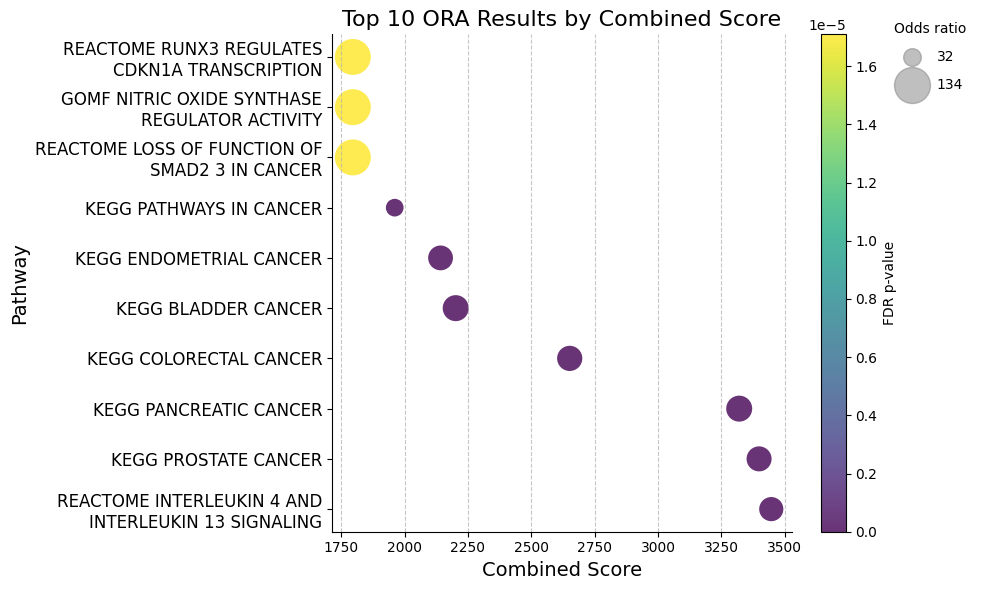

In [65]:
plot_ora_results(pathway_df, top_n=10, figsize=(10, 6), scale_odds_ratio=5, 
                     fontsize_title=16, fontsize_subtitle=14, fontsize_text=12,)

In [66]:
pathway_df_no_cancer = pathway_df[~pathway_df['Term'].str.contains('cancer', case=False)]

/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Top 10 ORA Results by Combined Score'}, xlabel='Combined Score', ylabel='Pathway'>)

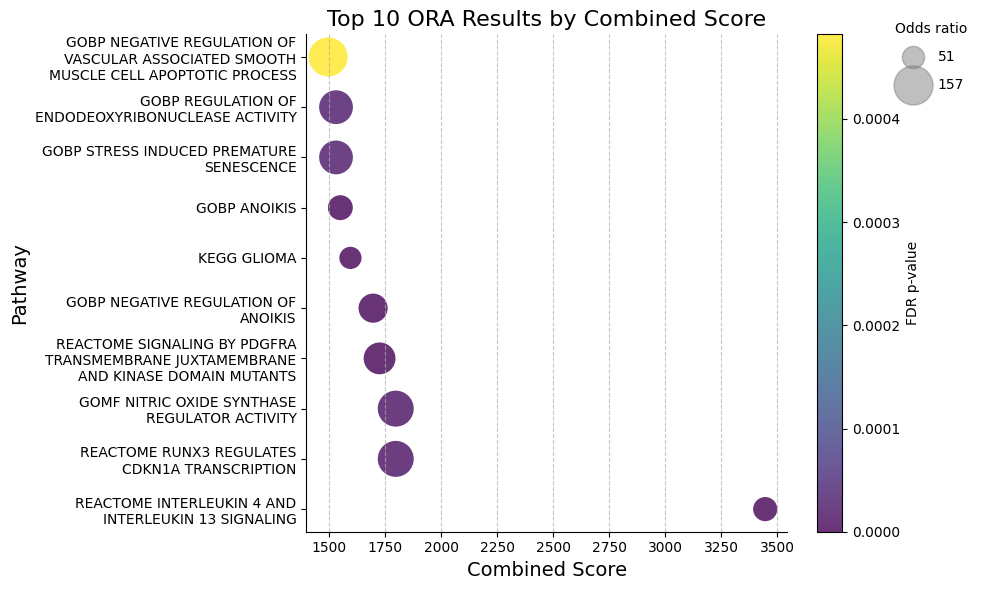

In [69]:
plot_ora_results(pathway_df_no_cancer, top_n=10, figsize=(10, 6), scale_odds_ratio=5, 
                     fontsize_title=16, fontsize_subtitle=14, fontsize_text=10,)